In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas import Series,DataFrame

In [78]:
df_survey = pd.read_csv("survey_results_public.csv")

In [79]:
df_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [80]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [81]:
df_survey.shape

(64461, 61)

In [82]:
df_survey.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [83]:
p=0
t=df_survey.Country.unique()
for item in t:
    p+=1
print (p)


184


In [84]:
country_copy= df_survey["Country"].copy()
country_copy


0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64461, dtype: object

In [85]:
country_df = pd.DataFrame(country_copy.value_counts()).reset_index()
country_df

,index,Country
0,United States,12469
1,India,8403
2,United Kingdom,3896
3,Germany,3890
4,Canada,2191
...,...,...
178,Kiribati,1
179,Nauru,1
180,Lesotho,1
181,Saint Lucia,1


In [86]:
country_df.columns=["Country","Responses"]
country_df

,Country,Responses
0,United States,12469
1,India,8403
2,United Kingdom,3896
3,Germany,3890
4,Canada,2191
...,...,...
178,Kiribati,1
179,Nauru,1
180,Lesotho,1
181,Saint Lucia,1


In [87]:
country_df["Percentage"]=np.round(country_df.Responses/sum(country_df.Responses)*100, 2)
country_df

,Country,Responses,Percentage
0,United States,12469,19.46
1,India,8403,13.11
2,United Kingdom,3896,6.08
3,Germany,3890,6.07
4,Canada,2191,3.42
...,...,...,...
178,Kiribati,1,0.00
179,Nauru,1,0.00
180,Lesotho,1,0.00
181,Saint Lucia,1,0.00


In [88]:
country_df.head(10)

,Country,Responses,Percentage
0,United States,12469,19.46
1,India,8403,13.11
2,United Kingdom,3896,6.08
3,Germany,3890,6.07
4,Canada,2191,3.42
5,France,1898,2.96
6,Brazil,1818,2.84
7,Netherlands,1343,2.10
8,Poland,1278,1.99
9,Australia,1208,1.89


Text(0.5, 1.0, "StackOverflow's Top 10 Respondent Countries")

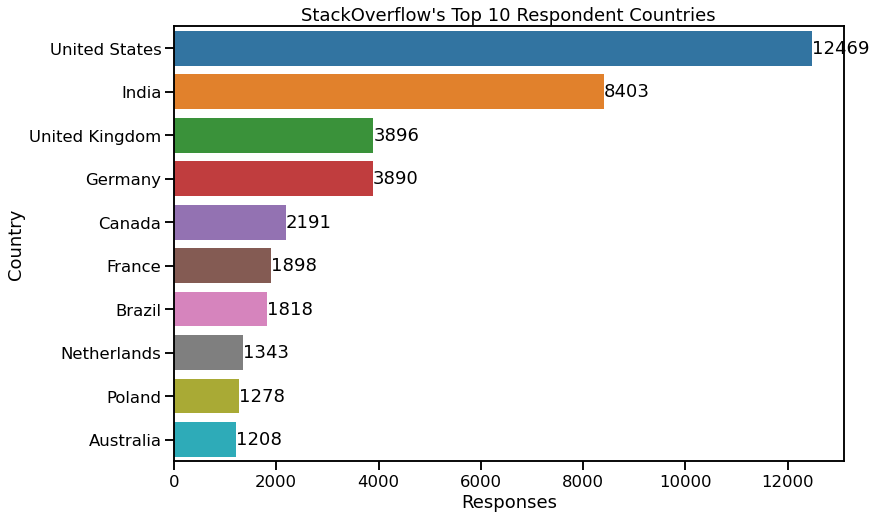

In [89]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=country_df.head(10),x="Responses",y="Country")
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow's Top 10 Respondent Countries")

Text(0.5, 1.0, "StackOverFlow's Top 10 Respondent Countries")

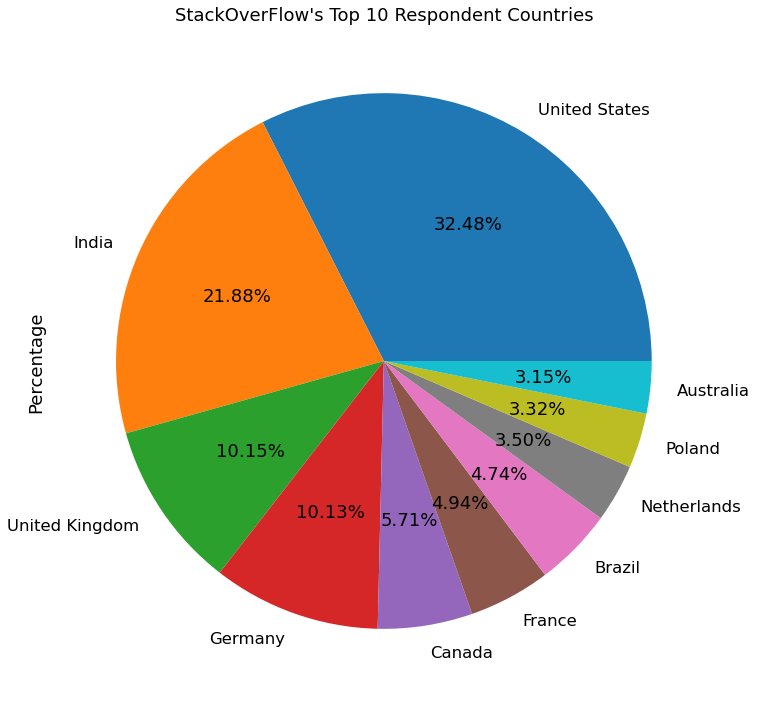

In [90]:
country_df_pie= country_df.head(10).set_index("Country")
country_df_pie.plot.pie(figsize=(12,15),y="Percentage",autopct='%.2f%%',legend=False)
plt.title("StackOverFlow's Top 10 Respondent Countries")

In [99]:
branch_ser=df_survey['MainBranch'].copy()
branch_ser

0                           I am a developer by profession
1                           I am a developer by profession
2                              I code primarily as a hobby
3                           I am a developer by profession
4        I used to be a developer by profession, but no...
                               ...                        
64456                                                  NaN
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: MainBranch, Length: 64461, dtype: object

In [102]:
branch_df=pd.DataFrame(branch_ser.value_counts()).reset_index()
branch_df

,index,MainBranch
0,I am a developer by profession,47193
1,I am a student who is learning to code,7970
2,"I am not primarily a developer, but I write co...",5502
3,I code primarily as a hobby,2314
4,"I used to be a developer by profession, but no...",1183


In [105]:
branch_df.columns=["MainBranch","Responses"]
branch_df

,MainBranch,Responses
0,I am a developer by profession,47193
1,I am a student who is learning to code,7970
2,"I am not primarily a developer, but I write co...",5502
3,I code primarily as a hobby,2314
4,"I used to be a developer by profession, but no...",1183


Text(0.5, 1.0, "StackOverFlow's Employment Status of correspondents")

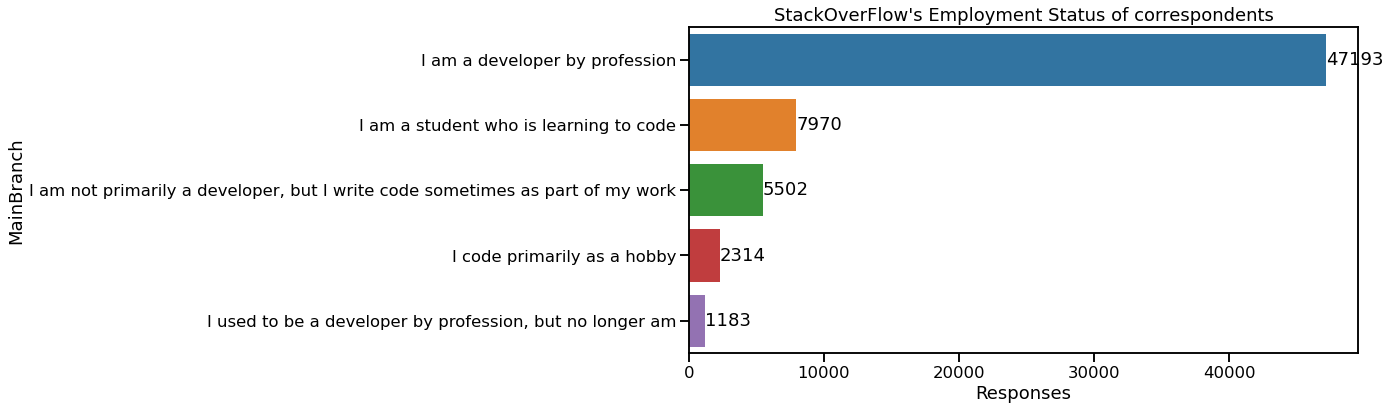

In [108]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=branch_df,x="Responses",y="MainBranch")
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverFlow's Employment Status of correspondents")

In [123]:
t_ser= df_survey.groupby("Country")["MainBranch"].unique()
t_ser

Country
Afghanistan                             [I am a developer by profession, I am a studen...
Albania                                 [I am a developer by profession, I am a studen...
Algeria                                 [I am a student who is learning to code, I cod...
Andorra                                 [I am a developer by profession, I am not prim...
Angola                                  [I am not primarily a developer, but I write c...
                                                              ...                        
Venezuela, Bolivarian Republic of...    [I am a developer by profession, I am a studen...
Viet Nam                                [I am a student who is learning to code, I am ...
Yemen                                   [I am a student who is learning to code, I am ...
Zambia                                  [I am a student who is learning to code, I am ...
Zimbabwe                                [I am a developer by profession, I code primar...
Na

In [124]:
t_df= pd.DataFrame(t_ser.value_counts()).reset_index()
t_df

,index,MainBranch
0,[I am a developer by profession],12
1,[I am a student who is learning to code],3
2,"[I am a developer by profession, I am a studen...",1
3,"[I am not primarily a developer, but I write c...",1
4,"[I am a developer by profession, I am a studen...",1
...,...,...
165,"[I am a developer by profession, I am a studen...",1
166,"[I am not primarily a developer, but I write c...",1
167,"[I am a developer by profession, I code primar...",1
168,"[I am a student who is learning to code, I am ...",1


In [92]:
yes=0
no=0

for line in df_survey["Hobbyist"]:
    if line=="Yes":
        yes+=1
        
    elif line=="No":
        no+=1
total=yes+no
print(yes/total *100)
print(no/total *100)

78.22280178837556
21.77719821162444


Text(0.5, 1.0, 'Coding as a hobby or nah')

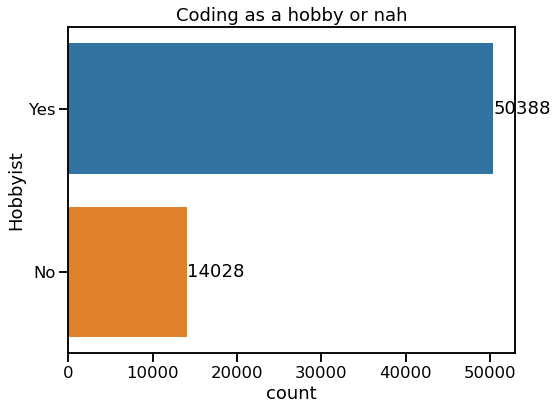

In [112]:
plt.figure(figsize=(8,6))
t= sns.countplot(data=df_survey,y=df_survey["Hobbyist"])
for i in t.containers:
    t.bar_label(i)
plt.title("Coding as a hobby or nah")

In [125]:
age1st_ser= df_survey["Age1stCode"].dropna().copy()
age1st_ser

0        13
1        19
2        15
3        18
4        16
         ..
64449    27
64451    19
64453     5
64454    21
64456    16
Name: Age1stCode, Length: 57900, dtype: object

In [126]:
age1st_df=pd.DataFrame(age1st_ser.value_counts()).reset_index()
age1st_df

,index,Age1stCode
0,15,5618
1,14,5514
2,16,5463
3,18,5382
4,12,5081
...,...,...
58,68,1
59,76,1
60,72,1
61,83,1


In [129]:
age1st_df["Percentage"]=round(age1st_df.Responses/ sum(age1st_df.Responses)*100, 2)
age1st_df

,Age1stCode,Responses,Percentage
0,15,5618,9.70
1,14,5514,9.52
2,16,5463,9.44
3,18,5382,9.30
4,12,5081,8.78
...,...,...,...
58,68,1,0.00
59,76,1,0.00
60,72,1,0.00
61,83,1,0.00


Text(0.5, 1.0, "StackOverFlow Respondents' Ages")

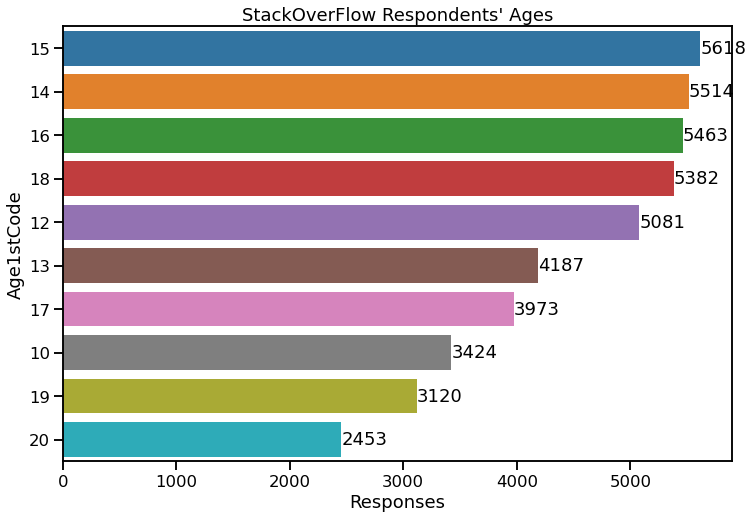

In [137]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=age1st_df.head(10),x="Responses",y="Age1stCode")
for item in ax.containers:
    ax.bar_label(item)
plt.title("StackOverFlow Respondents' Ages")

In [95]:
df_survey.groupby('Country')["WorkWeekHrs"].agg(sum)

Country
Afghanistan                              837.0
Albania                                 1355.0
Algeria                                 1069.0
Andorra                                  126.0
Angola                                   217.0
                                         ...  
Venezuela, Bolivarian Republic of...    1645.0
Viet Nam                                5127.0
Yemen                                     40.0
Zambia                                   380.0
Zimbabwe                                 559.0
Name: WorkWeekHrs, Length: 183, dtype: float64